In [2]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class

# Data Visual Analysis


Measure B to C: 
    Reading         Value
0 -0.000006 -9.727700e-09
1  0.001724  9.994659e-06
2  0.003453  1.999534e-05
3  0.005181  2.998611e-05
4  0.006908  3.998868e-05, 
Measure B to Q: 
     Reading         Value
0 -0.002851 -9.518300e-09
1  0.034843  9.994732e-06
2  0.073046  1.999520e-05
3  0.098491  2.998612e-05
4  0.113537  3.998895e-05, 
Measure B to R: 
    Reading         Value
0 -0.000004 -9.867400e-09
1  0.001730  9.994379e-06
2  0.003457  1.999556e-05
3  0.005189  2.998590e-05
4  0.006933  3.998896e-05


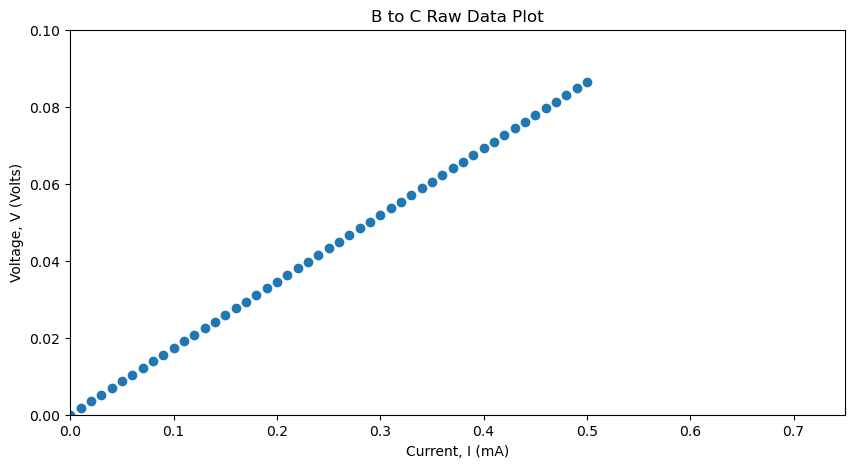

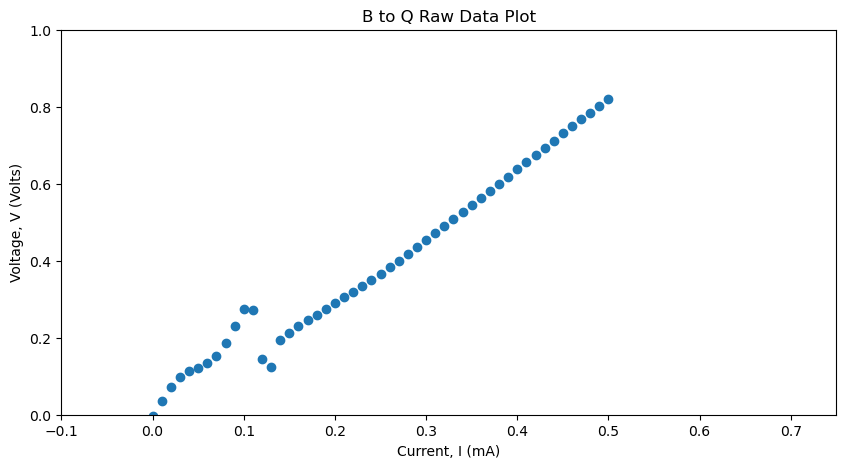

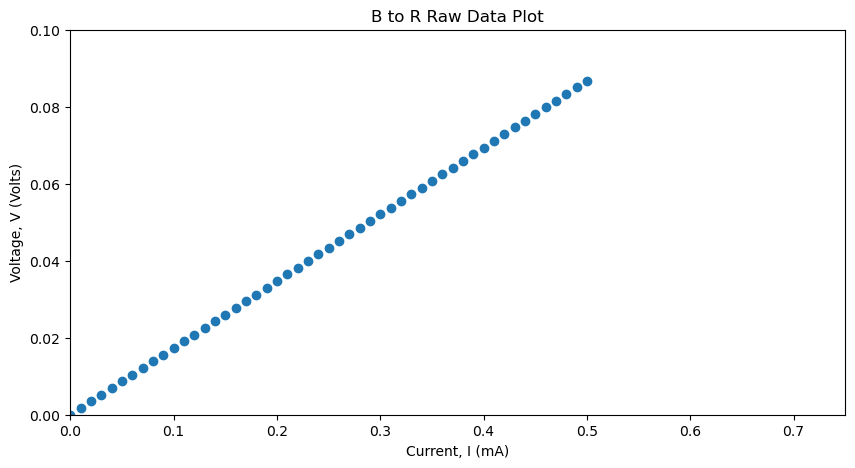

In [3]:
##############
# Import data
##############

BC_df = pd.read_csv("BF-C2-BC.csv")
BQ_df = pd.read_csv("BF-C2-BQ.csv")
BR_df = pd.read_csv("BF-C2-BR.csv")

print(f"Measure B to C: \n{BC_df.head()}, \nMeasure B to Q: \n {BQ_df.head()}, \nMeasure B to R: \n{BR_df.head()}")


##############
# Plot data
##############

BC_x = 1E3*BC_df["Value"] # grab column, we're converting to mA
BC_y = BC_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.show()

BQ_x = 1E3*BQ_df["Value"] # grab column
BQ_y = BQ_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(-0.1, 0.75) # x axis limits
plt.ylim(0, 1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, BQ_y, 'o')
plt.show()

BR_x = 1E3*BR_df["Value"] # grab column
BR_y = BR_df["Reading"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.title("B to R Raw Data Plot")
plt.plot(BR_x, BR_y, 'o')
plt.show()

# Subtracting The Non-Field Data
For the B to Q data we need to subract out the data from ST-C2-BQ which does not have the magnetic field. This should give us just the Hall voltage. I beleive we're expecting a linear graph from this result, where it's not linear currently.

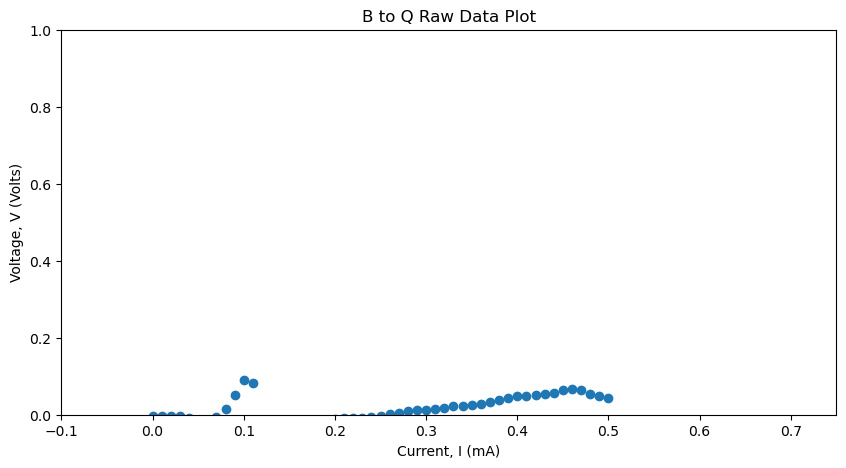

In [4]:
BQ_0_df = pd.read_csv("ST-C2-BQ.csv")
BQ_0_y = BQ_0_df["Reading"]
hv = BQ_y - BQ_0_y

# Plot:
BQ_x = 1E3*BQ_df["Value"] # grab column
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(-0.1, 0.75) # x axis limits
plt.ylim(0, 1) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to Q Raw Data Plot") # plot title
plt.plot(BQ_x, hv, 'o')
plt.show()

# Data Fitting w/ Uncertainties
We're going to set up our linear fit. Plot it to visualize how awesome it is. To finish we always print our key variables and their uncertainty

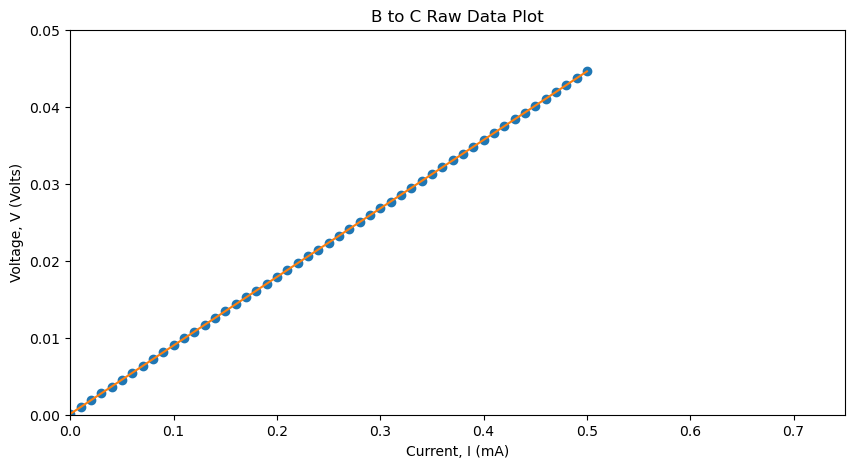

In [14]:
# Linear Fit Function:
def linFit(x, m, b):
    fit = m*x + b
    return fit


# Solve the Linear Fit:
popt, pcov = curve_fit(linFit, BC_x, BC_y, p0=[m:=0.75, b:=0]) # solves for m and b
y_fit = linFit(BC_x, *popt) # creates y(x) = gaus function with fitted values
uncertainties = np.sqrt(np.diag(pcov))


# Plot Results:
plt.figure(figsize=(10,5)) # set figure size
plt.xlim(0, 0.75) # x axis limits
plt.ylim(0, 0.05) # y axis limits
plt.xlabel("Current, I (mA)") # x axis label
plt.ylabel("Voltage, V (Volts)") # y axis label
plt.title("B to C Raw Data Plot") # plot title
plt.plot(BC_x, BC_y, 'o') # plot data
plt.plot(BC_x, y_fit) # plot linear fit
plt.show()

In [15]:
print(f"Resistance: {popt[0]}, Uncertainty: {uncertainties[0]}")

Resistance: 0.0889732146498631, Uncertainty: 3.9396328323545435e-06
